In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/marine_project/

/content/gdrive/MyDrive/marine_project


In [3]:
!ls

Copy_of_train_yolov8_object_detection_on_custom_dataset.ipynb  datasets


## Before Starting
Make sure that there is access to GPU. by use `nvidia-smi` command to do that.

In [5]:
!nvidia-smi

Fri Mar 24 23:26:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Install YOLOv8

In [6]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/78.2 GB disk)


In [7]:
from ultralytics import YOLO
from IPython.display import display, Image

## CLI Basics 

Yolov8 description
```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Preparing our custom dataset(marine dataset)

The dataset are annotate using roboflow plat form and the follwing steps are used ti do that

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a supported format, the Roboflow dashboard will automatically read the images and annotations together. 

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v5 PyTorch` dataset format.

<div align="center">
  <img
    width="640"
    src="https://ik.imagekit.io/roboflow/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




In [20]:
!mkdir /content/gdrive/MyDrive/marine_project/datasets
%cd /content/gdrive/MyDrive/marine_project//datasets

/content/gdrive/MyDrive/marine_project/datasets


In [21]:
!ls

In [22]:
!pip install roboflow --quiet

Upload the data set from roboflow

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="********************")#the api_key is a unique key for each usr so it is hidden
project = rf.workspace("your_workspace_name").project("ypur_project_name")
dataset = project.version(1).download("yolov8")

In [26]:
!ls

Marine-Trash-Detection-1


## Custom Training

In [27]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 24.0MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/gdrive/MyDrive/marine_project/datasets/Marine-Trash-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tr

In [30]:
HOME = '/content/gdrive/MyDrive/marine_project/datasets'

In [31]:
!ls {HOME}/runs/detect/train/

args.yaml					     train_batch2.jpg
confusion_matrix.png				     train_batch3765.jpg
events.out.tfevents.1679703072.f536b9982068.12797.0  train_batch3766.jpg
F1_curve.png					     train_batch3767.jpg
P_curve.png					     val_batch0_labels.jpg
PR_curve.png					     val_batch0_pred.jpg
R_curve.png					     val_batch1_labels.jpg
results.csv					     val_batch1_pred.jpg
results.png					     val_batch2_labels.jpg
train_batch0.jpg				     val_batch2_pred.jpg
train_batch1.jpg				     weights


/content/gdrive/MyDrive/marine_project/datasets


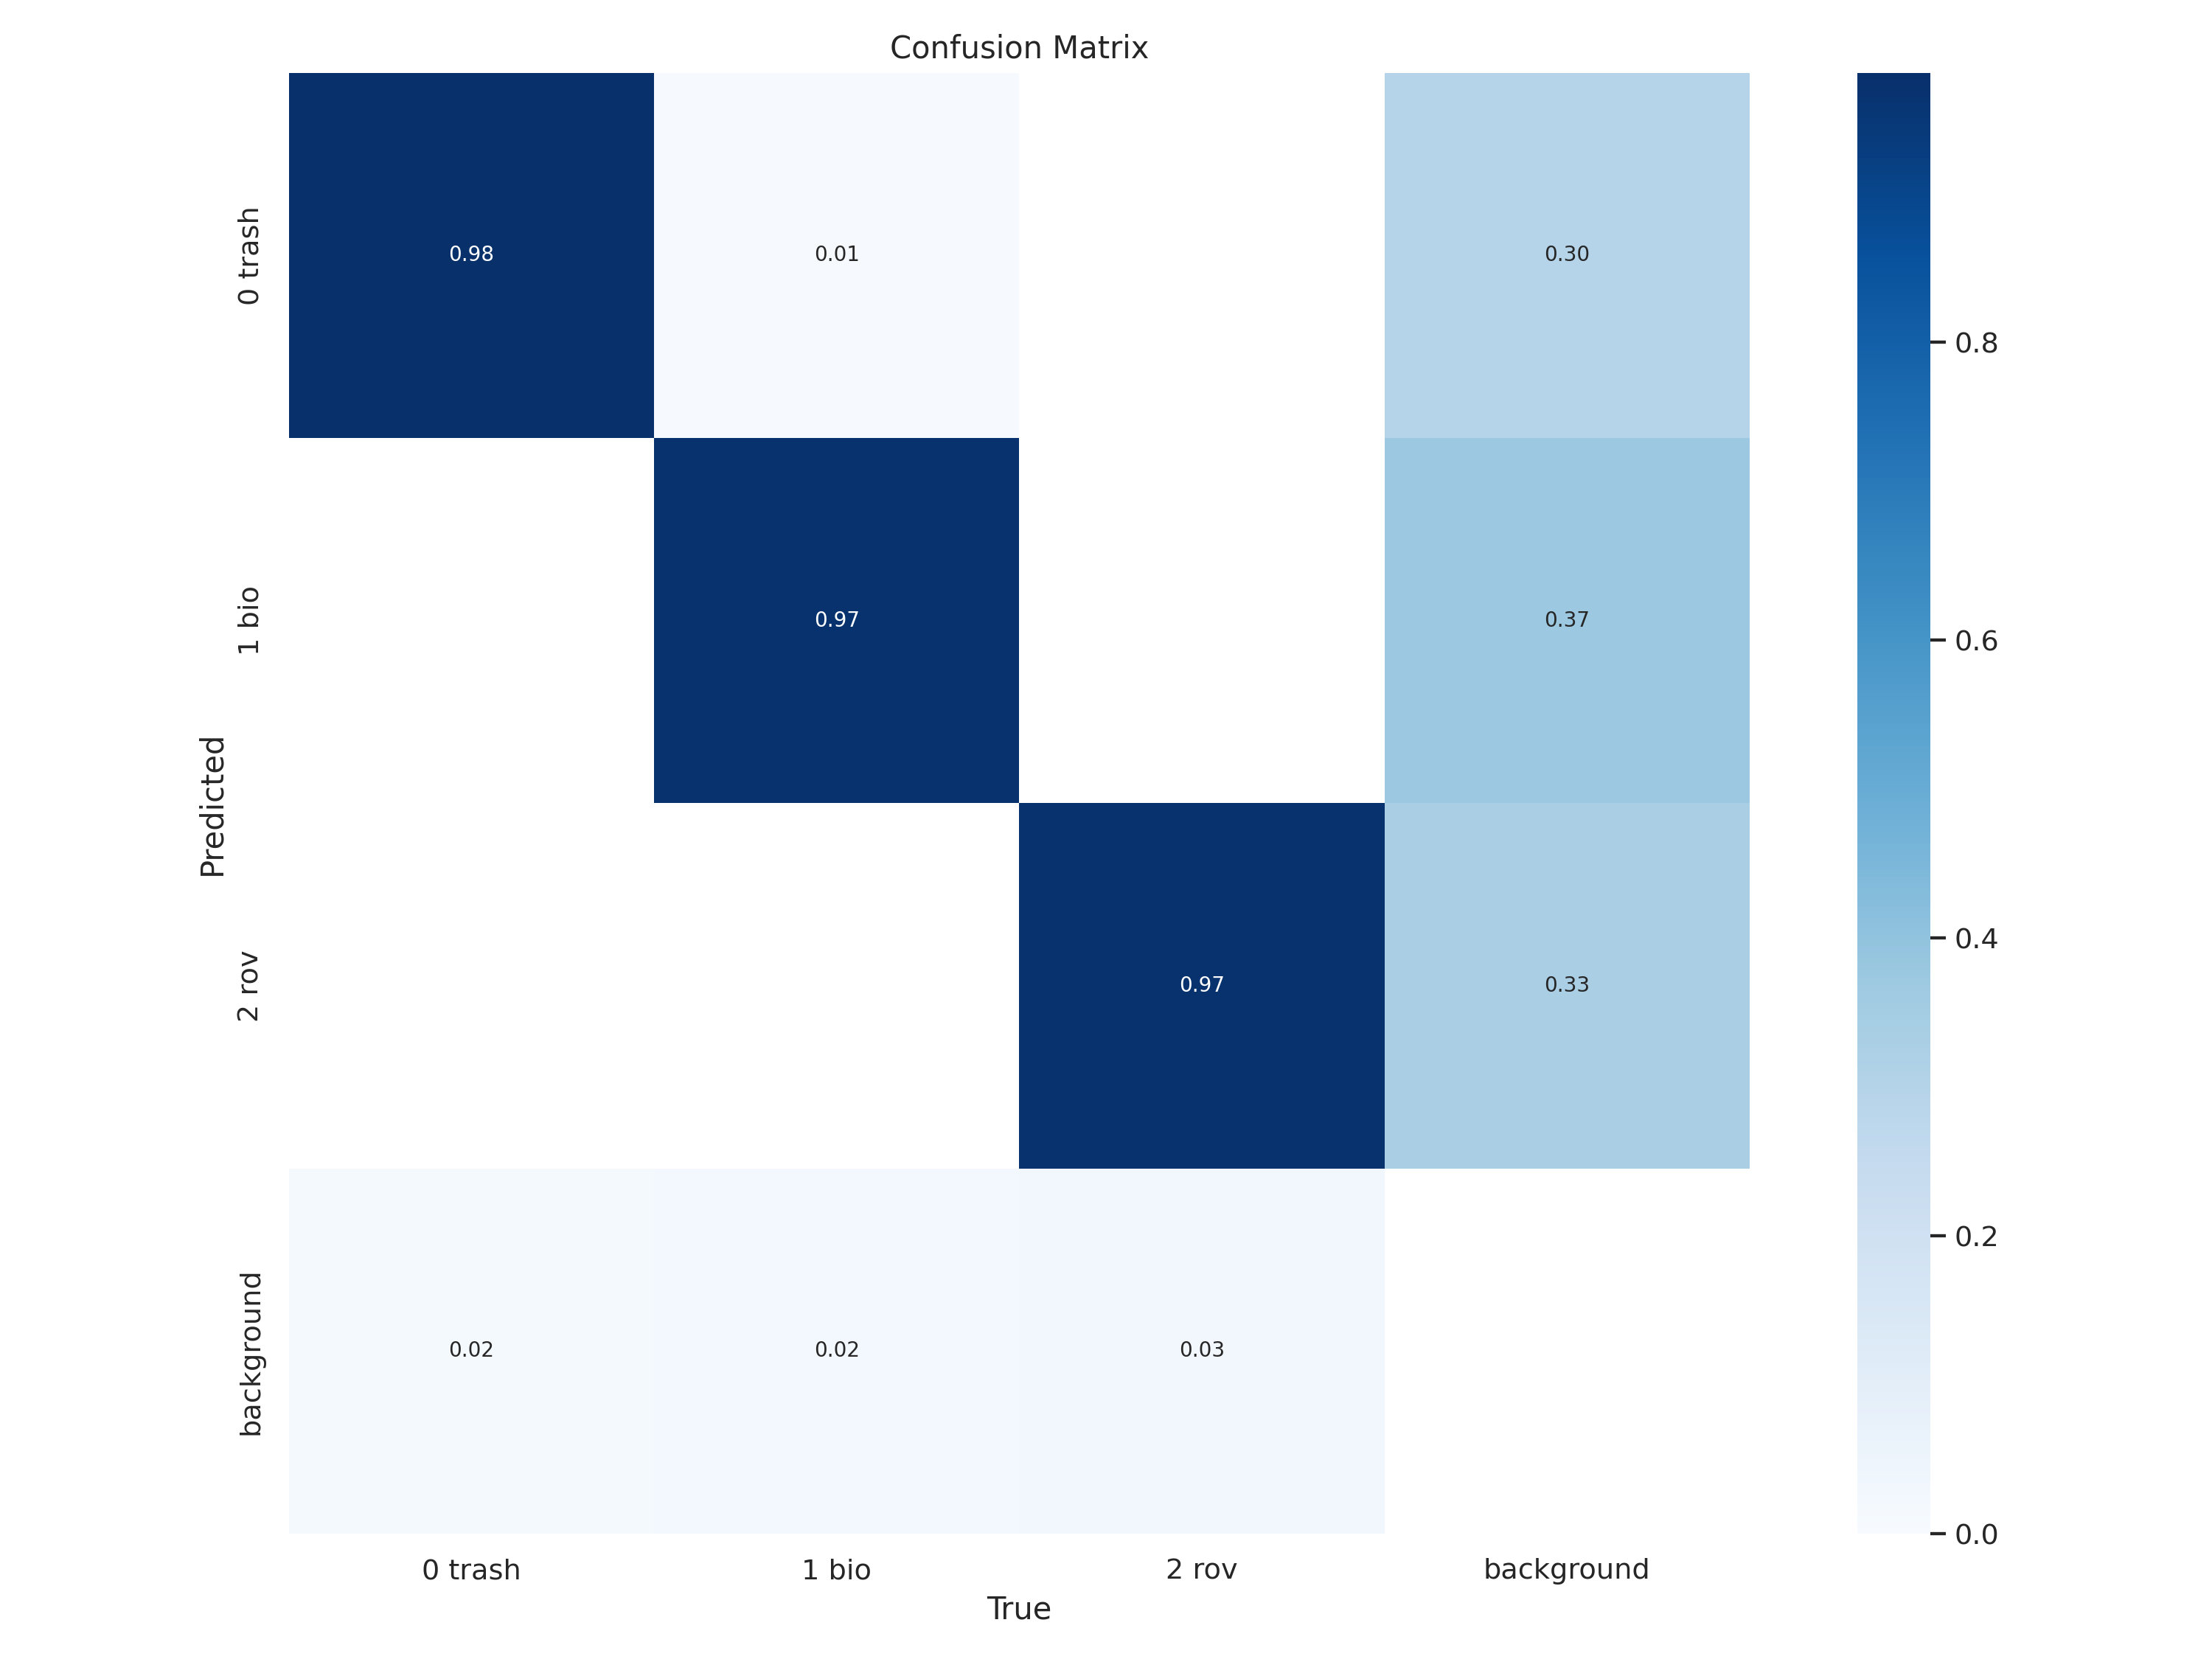

In [32]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/gdrive/MyDrive/marine_project/datasets


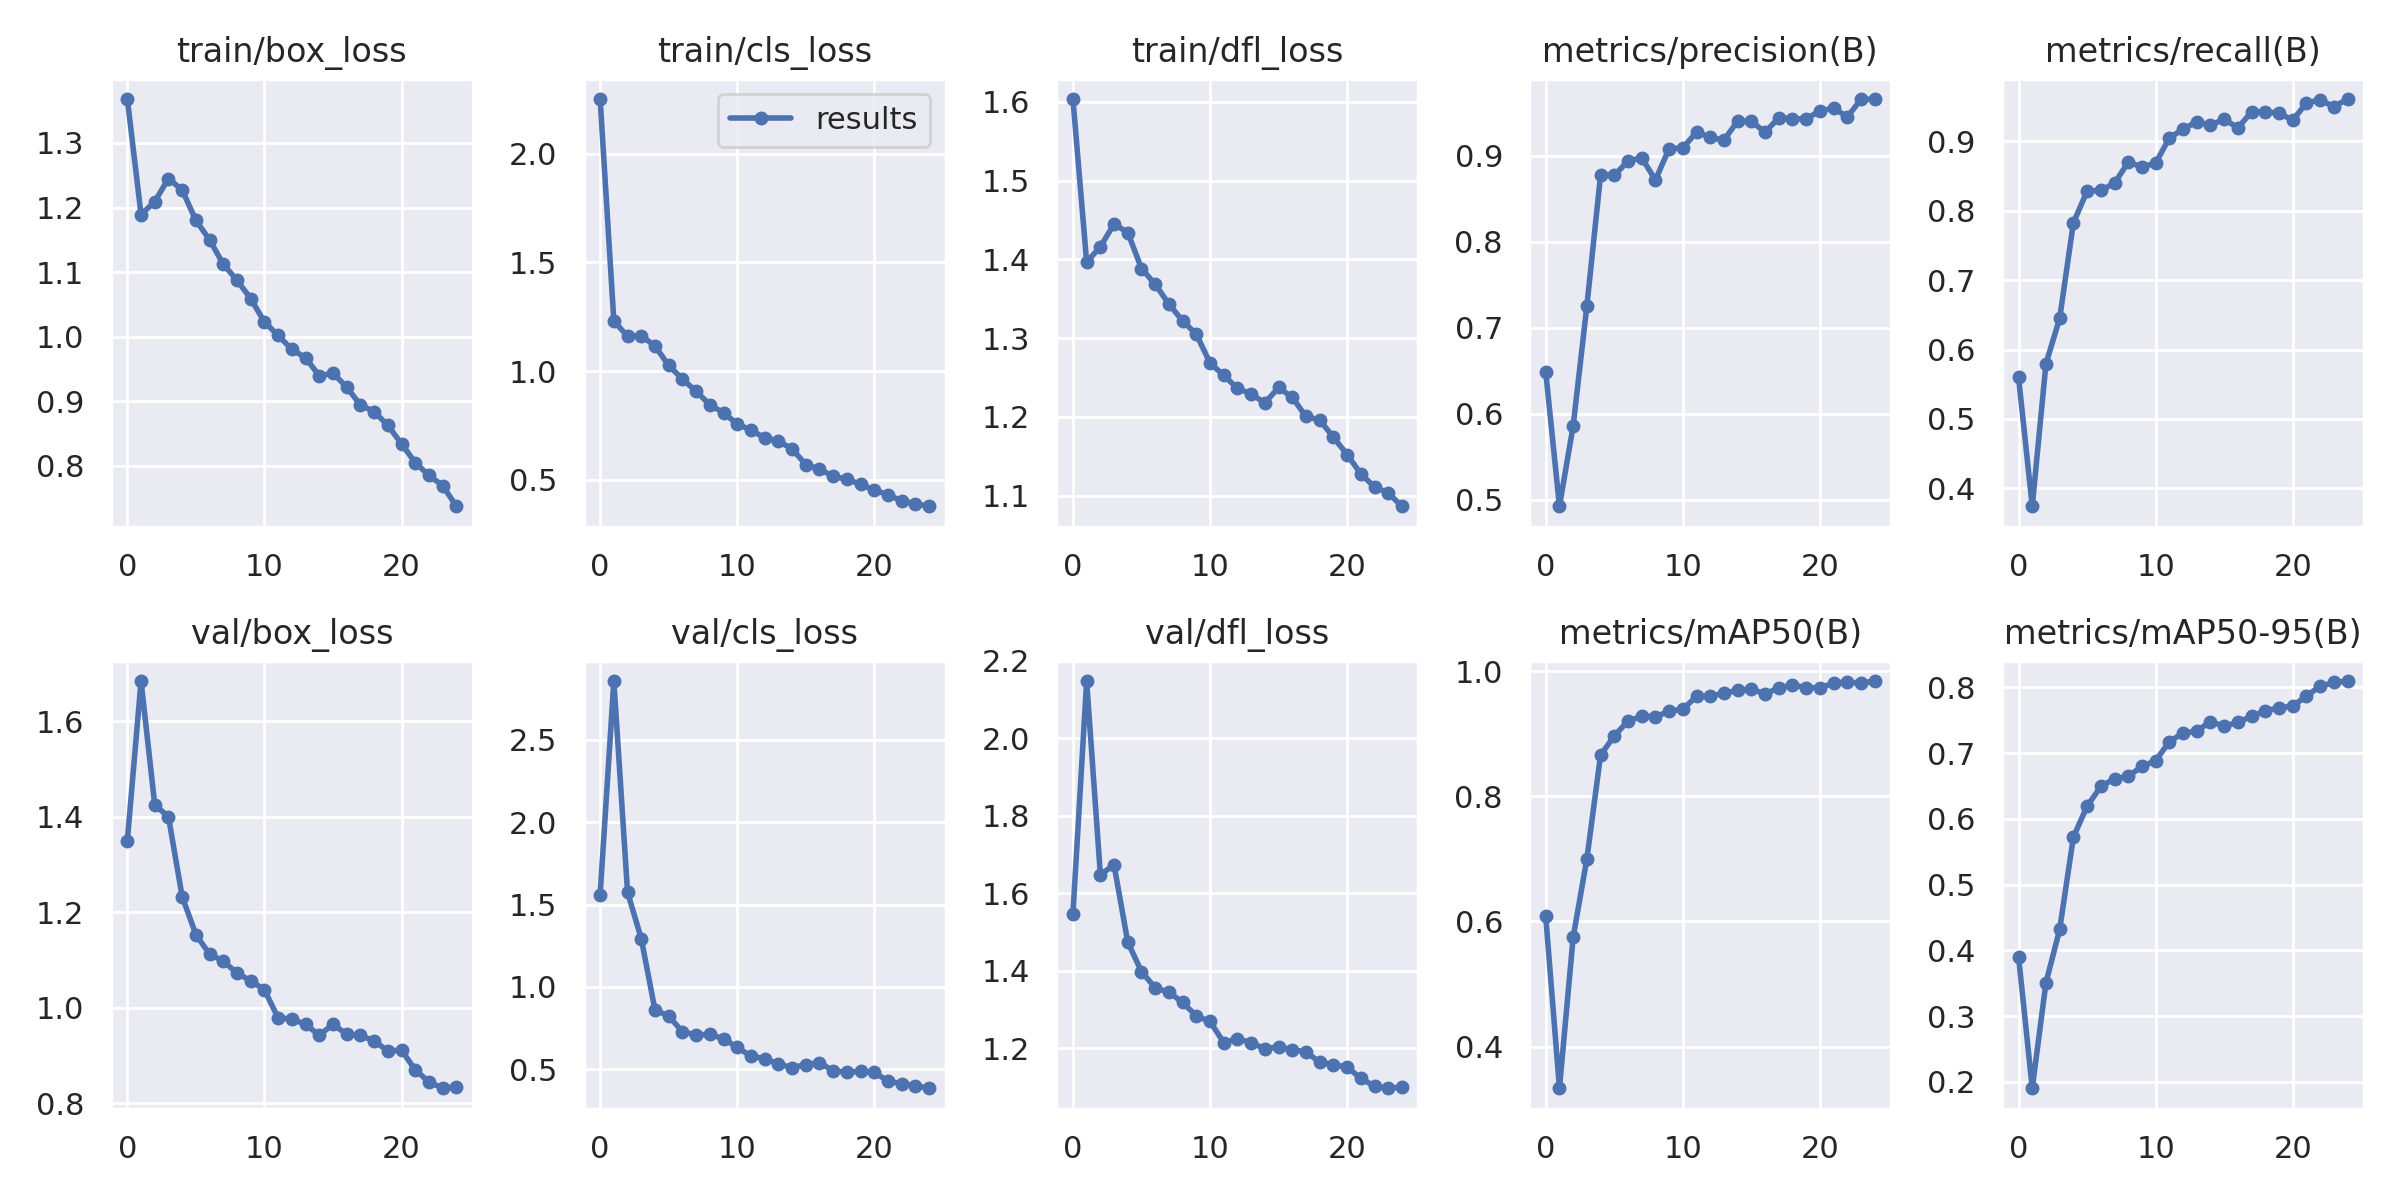

In [33]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content/gdrive/MyDrive/marine_project/datasets


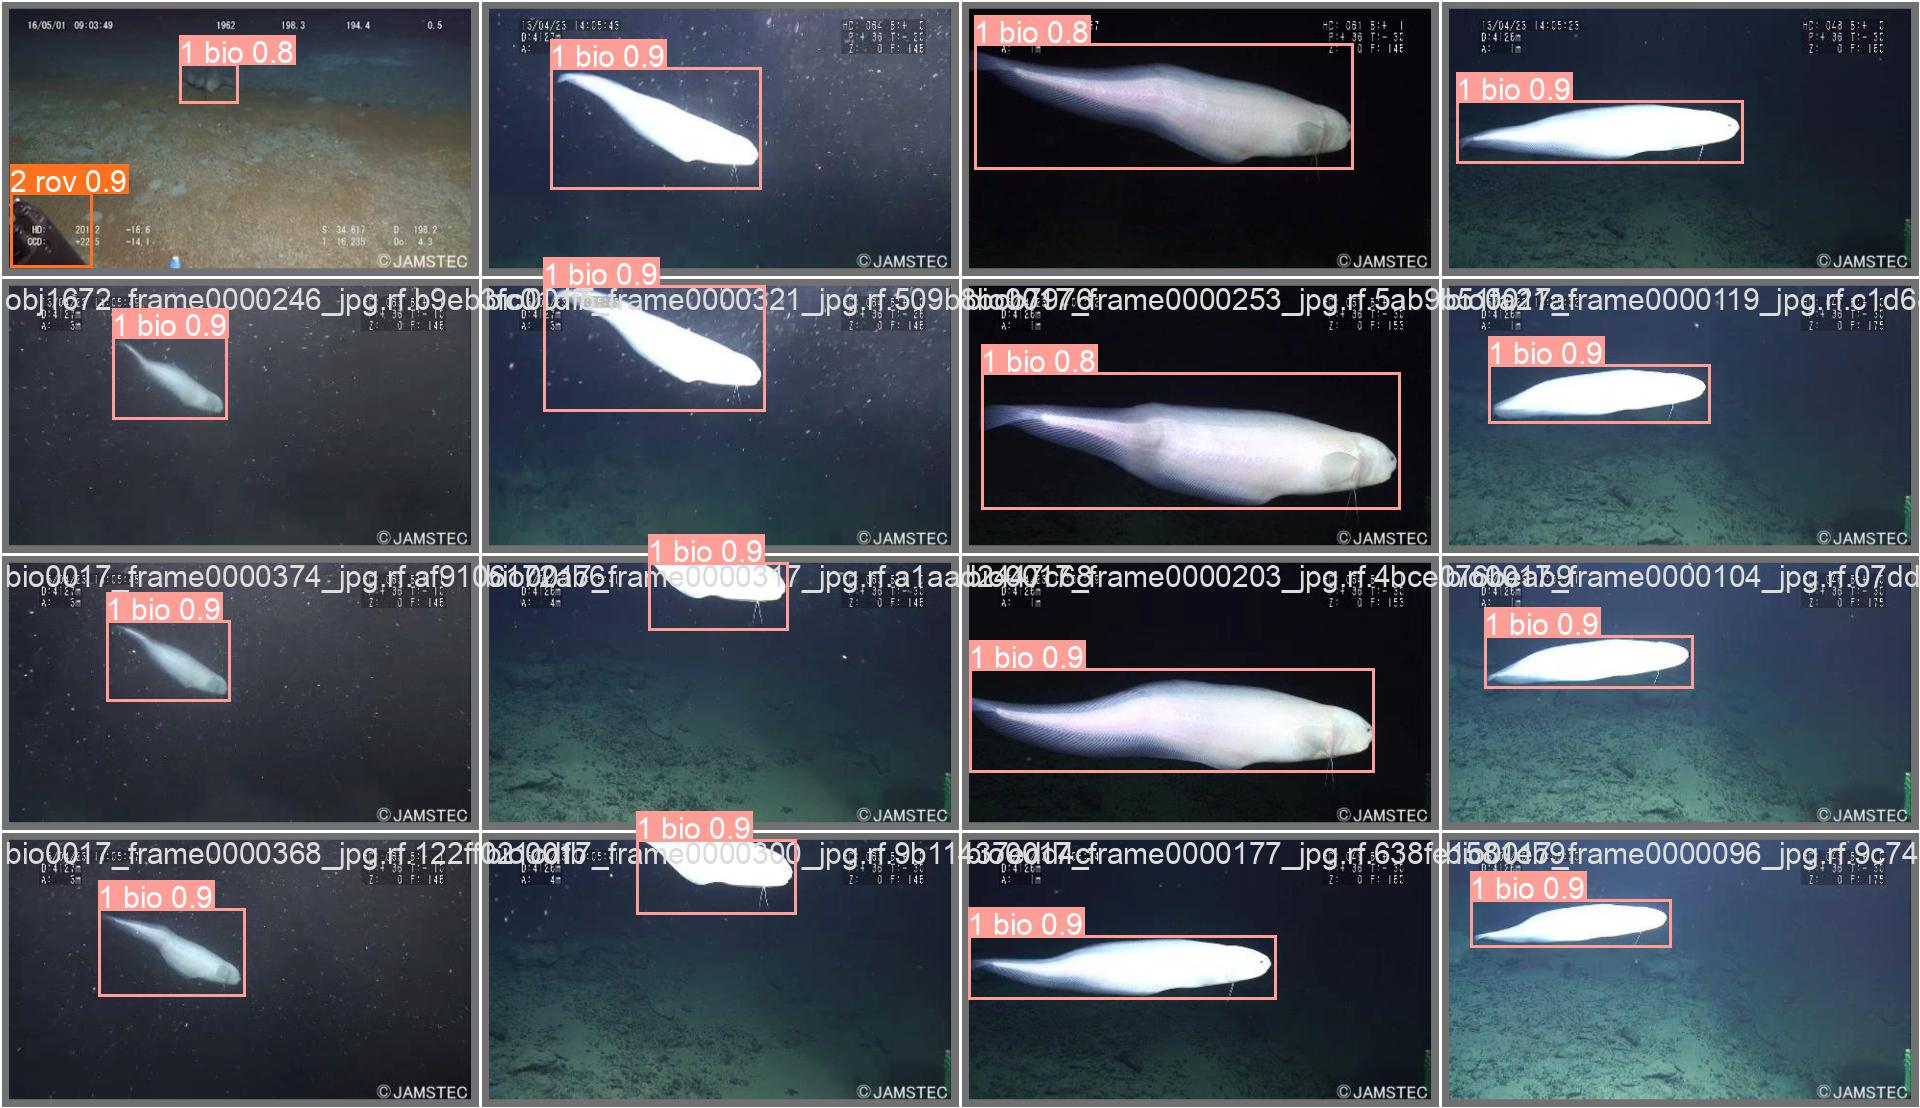

In [34]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [38]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/gdrive/MyDrive/marine_project/datasets
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/gdrive/MyDrive/marine_project/datasets/Marine-Trash-Detection-1/valid/labels.cache... 1143 images, 0 backgrounds, 0 corrupt: 100% 1143/1143 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/gdrive/MyDrive/marine_project/datasets/Marine-Trash-Detection-1/valid/images/obj1218_frame0000050_jpg.rf.65bbfbf0120807e4c732dd351ba20c95.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 72/72 [00:24<00:00,  2.95it/s]
                   all       1143       1649      0.966      0.961      0.984      0.809
               0 trash       1143        890      0.988      0.965      0.991      0.766
                 1 bio       1143        376      0.953      0.963      0.983      0.817
                

## Inference with Custom Model

In [39]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/gdrive/MyDrive/marine_project/datasets
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/572 /content/gdrive/MyDrive/marine_project/datasets/Marine-Trash-Detection-1/test/images/bio0000_frame0000002_jpg.rf.6420aea84c2029c6bd9550b2162fbf37.jpg: 608x800 2 1 bios, 24.1ms
image 2/572 /content/gdrive/MyDrive/marine_project/datasets/Marine-Trash-Detection-1/test/images/bio0000_frame0000025_jpg.rf.ae8a9a55cb9ba8ab8c76c2c7445ea0ca.jpg: 608x800 2 1 bios, 18.8ms
image 3/572 /content/gdrive/MyDrive/marine_project/datasets/Marine-Trash-Detection-1/test/images/bio0000_frame0000039_jpg.rf.f5f7282dd4b3d521015c6e061c3dd2c6.jpg: 608x800 2 1 bios, 18.8ms
image 4/572 /content/gdrive/MyDrive/marine_project/datasets/Marine-Trash-Detection-1/test/images/bio0000_frame0000089_jpg.rf.370f07b8bb15a959400de47edf177140.jpg: 608x800 2 1 bios, 18.8ms
image 5/572 /content/gdrive/MyDr

**NOTE:** Let's take a look at few results.

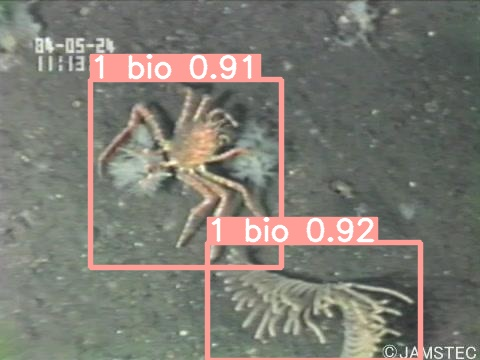

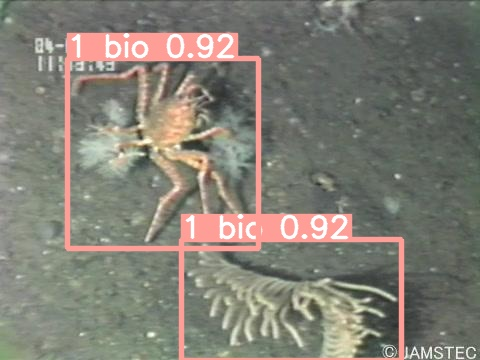

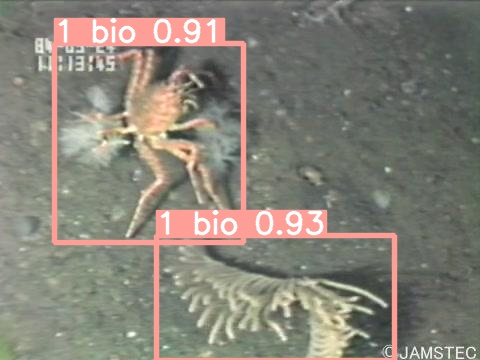

In [48]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Use our traind model 

if you want to use the model after trainig go to 
runs-> train->best.pt
**best.pt** is the model with best weight

In [44]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='{HOME}/runs/detect/predict/bio0000_frame0000002_jpg.rf.6420aea84c2029c6bd9550b2162fbf37.jpg' save=True show=True

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
qt.qpa.xcb: could not connect to display 
qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.9/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb.



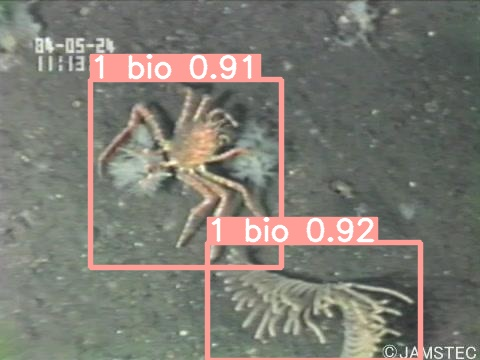

In [46]:
Image(filename=f'{HOME}/runs/detect/predict/bio0000_frame0000002_jpg.rf.6420aea84c2029c6bd9550b2162fbf37.jpg', height=500)